In [1]:
%matplotlib inline
import photutils
import astroquery
import numpy as np
import astropy.io.fits as fits

import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats

from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import astropy.units as u

In [2]:
# final_im = fits.open('../S20221228S0155_stack.fits')
final_im = fits.open('data/20220222/redux/fixed_astrometry/2022ann.fits.gz')

In [3]:
final_im[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =      733.11696618479 / Pixel coordinate of reference point            
CRPIX2  =      454.78232448341 / Pixel coordinate of reference point            
PC1_1   =  3.5192451249028E-

In [4]:
wcs = WCS(final_im[1].header)

In [5]:
SN22ann_coord = SkyCoord("10:17:29.66 -02:25:35.44", unit = (u.hourangle, u.deg))
x_off, y_off = 169, 288

In [6]:
mean, med, std = sigma_clipped_stats(final_im[1].data)

/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/1089683147.py:6: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  aperture = photutils.CircularAperture(SN22ann_pix, r=4)


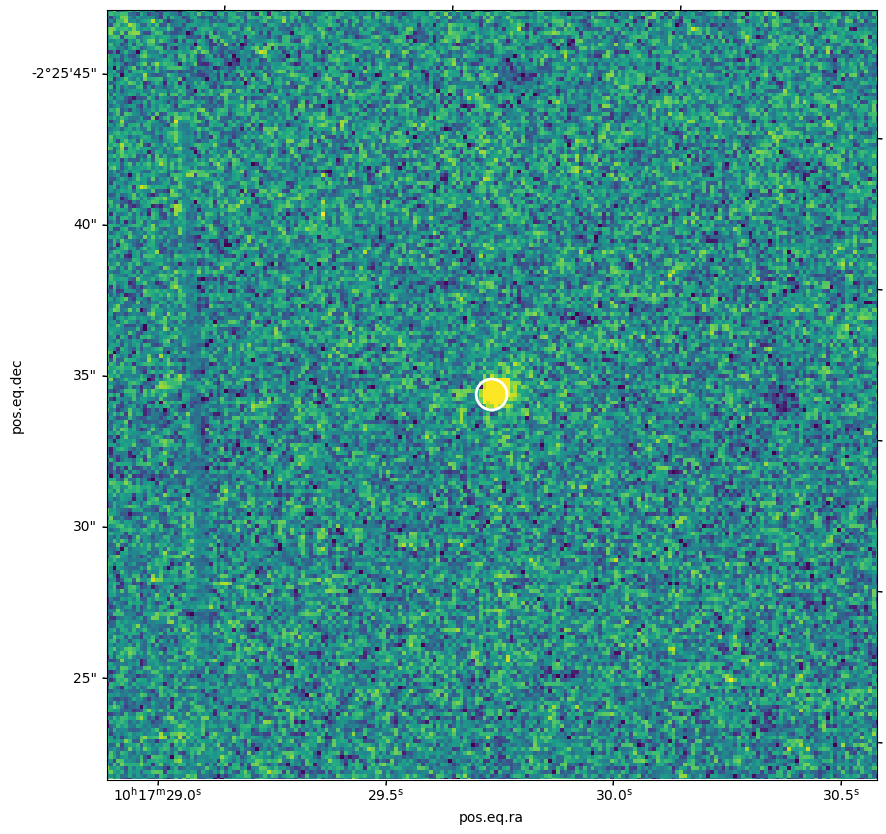

In [7]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(projection=wcs)

# positions = SkyCoord(catalog['l'], catalog['b'], frame='galactic')  
SN22ann_pix = wcs.world_to_pixel(SN22ann_coord) # + np.array([x_off, y_off])
aperture = photutils.CircularAperture(SN22ann_pix, r=4) 

ax.imshow(final_im[1].data, origin = 'lower', vmin = mean-3*std, vmax = mean+3*std)

ax.set_xlim([SN22ann_pix[0] - 100, SN22ann_pix[0] + 100])
ax.set_ylim([SN22ann_pix[1] - 100, SN22ann_pix[1] + 100])


ap_patches = aperture.plot(color='white', lw=2)

In [8]:
# final_im[3].data < 10

In [9]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1

In [10]:
#Query 2MASS and UKIDSS
result = Vizier.query_region(SN22ann_coord,
                        width="3m",
                        catalog=["II/246/out", "II/319/las9"])

In [11]:
good2M = result[0][ (result[0]['Qflg']=='AAA') & (result[0]['Bflg']=='111')]

In [12]:
good2M

RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg
deg,deg,,mag,mag,mag,mag,mag,mag,,,,,,
float64,float64,str17,float32,float32,float32,float32,float32,float32,str3,str3,str3,str3,uint8,uint8
154.381464,-2.422674,10173155-0225216,14.202,0.029,13.775,0.026,13.766,0.055,AAA,222,111,000,0,0


In [13]:
good_UKIDSS = result[1][result[1]['Kmag'] < 18]
# good_UKIDSS = good_UKIDSS[good_UKIDSS['cl']==1]

In [14]:
good_UKIDSS

ULAS,m,RAJ2000,DEJ2000,Ymag,e_Ymag,Jmag1,e_Jmag1,Jmag2,e_Jmag2,Hmag,e_Hmag,Kmag,e_Kmag,Epoch,pmRA,pmDE,cl
,,deg,deg,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,yr,mas / yr,mas / yr,
str19,uint8,float64,float64,float32,float32,float64,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,int16
J101734.65-022703.7,1,154.394410,-2.451044,17.403,0.016,17.065,0.017,--,--,16.735,0.023,16.660,0.047,2005.9716,--,--,-1
J101732.91-022702.6,1,154.387139,-2.450737,20.720,0.264,19.840,0.194,--,--,18.990,0.169,17.868,0.140,2005.9716,--,--,1
J101728.93-022644.8,1,154.370547,-2.445778,19.710,0.106,19.302,0.119,--,--,18.451,0.103,17.862,0.139,2005.9716,--,--,1
J101732.08-022623.9,1,154.383679,-2.439983,--,--,19.756,0.180,--,--,18.745,0.135,17.635,0.113,2005.9717,--,--,1
J101733.54-022621.6,1,154.389753,-2.439350,19.569,0.094,18.961,0.088,--,--,18.037,0.071,17.298,0.084,2005.9716,--,--,1
J101728.27-022614.2,1,154.367798,-2.437298,20.046,0.144,18.871,0.081,--,--,18.229,0.085,17.456,0.096,2005.9716,--,--,1
J101731.70-022607.0,1,154.382097,-2.435292,18.517,0.038,18.207,0.045,--,--,17.716,0.054,17.774,0.129,2005.9716,--,--,-1
J101732.78-022557.2,1,154.386606,-2.432563,20.226,0.169,19.686,0.169,--,--,18.945,0.162,17.954,0.152,2005.9716,--,--,1


In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.subplot(projection=wcs)

ax.imshow(final_im[1].data, origin = 'lower', vmin = mean-3*std, vmax = mean+5*std)

# positions = SkyCoord(catalog['l'], catalog['b'], frame='galactic')  
SN22ann_pix = wcs.world_to_pixel(SN22ann_coord) 
aperture_ann = photutils.CircularAperture(SN22ann_pix, r=10) 
ap_stats = photutils.ApertureStats(final_im[1].data, aperture_ann)  
aperture_ann = photutils.CircularAperture(ap_stats.centroid, r=10) 


annulus_ann =  photutils.CircularAnnulus(ap_stats.centroid, r_in=15, r_out=20)


# ax.set_xlim([SN22ann_pix[0] - 500, SN22ann_pix[0] + 500])
# ax.set_ylim([SN22ann_pix[1] - 500, SN22ann_pix[1] + 500])

ap_patches = aperture_ann.plot(color='blue', lw=2)
ap_patches = annulus_ann.plot(color='red', lw=2)


# for i in good2M:
ap_UKIDSS = []
bad_UKIDSS = []
for i in good_UKIDSS:
    coord = SkyCoord(ra = i['RAJ2000']*u.deg, dec = i['DEJ2000']*u.deg)
    pix = wcs.world_to_pixel(coord) 
    fake_ap = photutils.CircularAperture(pix, r=10)
    ap_stats = photutils.ApertureStats(final_im[1].data, fake_ap)  
    if ~np.isnan(ap_stats.centroid[0]):
#         print(pix, ap_stats.centroid[0])
        ap_UKIDSS += [ap_stats.centroid]
    else:
        ap_UKIDSS += [pix]
#     bad_UKIDSS += [pix]
#     ap_UKIDSS += [pix]
    
aperture_UKIDSS = photutils.CircularAperture(ap_UKIDSS, r=15) 
# foo = photutils.CircularAperture(bad_UKIDSS, r=10) 
annulus_UKIDSS = photutils.CircularAnnulus(ap_UKIDSS, r_in=20, r_out = 30) 

aperture_UKIDSS.plot(color='white', lw=1)
annulus_UKIDSS.plot(color = 'red', lw = 1)
for i in range(len(aperture_UKIDSS)):
    ax.text(aperture_UKIDSS.positions[i][0], aperture_UKIDSS.positions[i][1], i, fontsize = 18)
# foo.plot(color = 'k')

/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3222752692.py:8: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the future. Instead, please use `from photutils.aperture import CircularAperture` to silence this warning.
  aperture_ann = photutils.CircularAperture(SN22ann_pix, r=10)
/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3222752692.py:9: DeprecationWarning: `photutils.ApertureStats` is a deprecated alias for `photutils.aperture.ApertureStats` and will be removed in the future. Instead, please use `from photutils.aperture import ApertureStats` to silence this warning.
  ap_stats = photutils.ApertureStats(final_im[1].data, aperture_ann)
/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3222752692.py:10: DeprecationWarning: `photutils.CircularAperture` is a deprecated alias for `photutils.aperture.CircularAperture` and will be removed in the futu

In [ ]:
# aperture_UKIDSS.positions

In [17]:
phot_table_ann = photutils.aperture_photometry(final_im[1].data, aperture_ann, error=np.sqrt(final_im[2].data))
phot_bkg_ann =   photutils.aperture_photometry(final_im[1].data, annulus_ann, error=np.sqrt(final_im[2].data))

/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3466477718.py:1: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  phot_table_ann = photutils.aperture_photometry(final_im[1].data, aperture_ann, error=np.sqrt(final_im[2].data))
/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3466477718.py:2: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  phot_bkg_ann =   photutils.aperture_photometry(final_im[1].data, annulus_ann, error=np.sqrt(final_im[2].data))


In [18]:
print(phot_table_ann)
print(phot_bkg_ann)

 id      xcenter           ycenter         aperture_sum    aperture_sum_err
           pix               pix                                           
--- ----------------- ----------------- ----------------- -----------------
  1 200.5211423324789 463.6765845667649 8489.032893440788 30.69980141159424
 id      xcenter           ycenter          aperture_sum     aperture_sum_err
           pix               pix                                             
--- ----------------- ----------------- ------------------- -----------------
  1 200.5211423324789 463.6765845667649 -1.3914602306298605 40.61201988370567


In [19]:
phot_table_UKIDSS = photutils.aperture_photometry(final_im[1].data, aperture_UKIDSS, error=np.sqrt(final_im[2].data))
phot_bkg_UKIDSS =   photutils.aperture_photometry(final_im[1].data, annulus_UKIDSS, error=np.sqrt(final_im[2].data))

/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3250798286.py:1: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  phot_table_UKIDSS = photutils.aperture_photometry(final_im[1].data, aperture_UKIDSS, error=np.sqrt(final_im[2].data))
/var/folders/13/y21nm6dj43qd6sqkwpz3gfsw0000gn/T/ipykernel_89745/3250798286.py:2: DeprecationWarning: `photutils.aperture_photometry` is a deprecated alias for `photutils.aperture.aperture_photometry` and will be removed in the future. Instead, please use `from photutils.aperture import aperture_photometry` to silence this warning.
  phot_bkg_UKIDSS =   photutils.aperture_photometry(final_im[1].data, annulus_UKIDSS, error=np.sqrt(final_im[2].data))


In [20]:
ann_bkg_sub = phot_table_ann[0]['aperture_sum'] - phot_bkg_ann[0]['aperture_sum']/annulus_ann.area*aperture_ann.area
ann_bkg_sub_err = np.sqrt(phot_table_ann[0]['aperture_sum_err']**2 + 
                (phot_bkg_ann[0]['aperture_sum_err']/annulus_ann.area*aperture_ann.area)**2)


In [21]:
print('Target photometry is %f +- %f electrons'%(ann_bkg_sub, ann_bkg_sub_err))

Target photometry is 8489.828014 +- 38.484238 electrons


In [22]:
aperture_UKIDSS.area

706.8583470577034

In [23]:
UKIDSS_good = [4,6,7,13,15]

In [24]:
phot_table_UKIDSS[UKIDSS_good]

id,xcenter,ycenter,aperture_sum,aperture_sum_err
,pix,pix,,
int64,float64,float64,float64,float64
5,685.9896225123838,785.276687948829,29652.071035145094,46.04970213382491
7,461.9412947917836,690.5131184704908,17202.134662646873,46.04970210393855
8,580.9127233658074,601.04967380288,14643.849150049216,46.049702104242996
14,670.7108755738567,567.0176827893882,25125.991688497783,46.0497021159337
16,410.3571813431342,336.143963310748,884599.7412747566,46.04970210748663


In [25]:
UKIDSS_bkg_sub = phot_table_UKIDSS[UKIDSS_good]['aperture_sum'] - phot_bkg_UKIDSS[UKIDSS_good]['aperture_sum']/annulus_UKIDSS.area*aperture_UKIDSS.area
UKIDSS_bkg_sub_err = np.sqrt(phot_table_UKIDSS[UKIDSS_good]['aperture_sum_err']**2 + 
                (phot_bkg_UKIDSS[UKIDSS_good]['aperture_sum_err']/annulus_UKIDSS.area*aperture_UKIDSS.area)**2)


In [26]:
UKIDSS_bkg_sub, UKIDSS_bkg_sub_err

(<Column name='aperture_sum' dtype='float64' length=5>
  27775.84251695677
 15049.719085113373
 12417.428985507406
 22653.535543770195
  876304.0697586295,
 <Column name='aperture_sum_err' dtype='float64' length=5>
  55.45118434651921
  55.45118432125844
 55.451184326563286
  55.45118434151648
  55.45118432589416)

In [27]:
# good_UKIDSS

In [28]:
mags = good_UKIDSS[UKIDSS_good]['Kmag']
mag_err = good_UKIDSS[UKIDSS_good]['e_Kmag']

In [29]:
mags, mag_err

(<MaskedColumn name='Kmag' dtype='float32' unit='mag' format='{:6.3f}' description='? UKIDSS K default magnitude (kAperMag3) (G1)' length=5>
 17.298
 17.774
 17.954
 17.474
 13.669,
 <MaskedColumn name='e_Kmag' dtype='float32' unit='mag' format='{:6.3f}' description='? Mean error on Kmag (kAperMag3Err)' length=5>
  0.084
  0.129
  0.152
  0.098
  0.004)

In [30]:
ZP = mags + 2.5*np.log10(UKIDSS_bkg_sub) 
ZP_err = np.sqrt(mag_err**2 + (2.5/UKIDSS_bkg_sub/np.log(10)*UKIDSS_bkg_sub_err)**2)

In [31]:
ZP, ZP_err

(<MaskedColumn name='Kmag' dtype='float64' length=5>
 28.407168438561428
 28.217821151737155
 28.189079685451546
 28.361840911042727
 28.525636743590645,
 <MaskedColumn name='e_Kmag' dtype='float64' length=5>
 0.08402795938127333
 0.12906200784495026
 0.15207730435480324
  0.0980360275773314
 0.00400059020410021)

(array([2., 0., 0., 0., 0., 1., 1., 0., 0., 1.]),
 array([28.18907969, 28.22273539, 28.2563911 , 28.2900468 , 28.32370251,
        28.35735821, 28.39101392, 28.42466963, 28.45832533, 28.49198104,
        28.52563674]),
 <BarContainer object of 10 artists>)

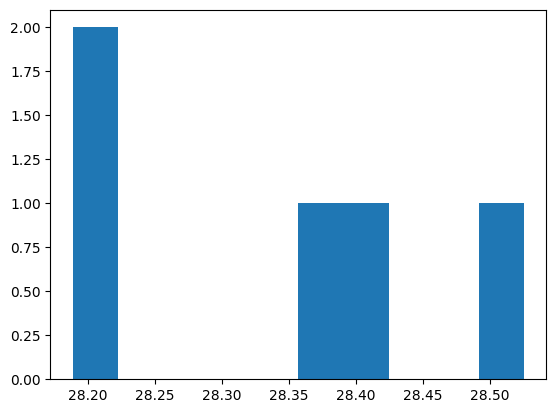

In [32]:
plt.hist(ZP)

In [33]:
########2022ann mag

mag_2022ann = -2.5*np.log10(ann_bkg_sub) + ZP
emag_2022ann = np.sqrt(ZP_err**2 + (2.5/ann_bkg_sub/np.log(10)*ann_bkg_sub_err)**2)

In [34]:
mag_2022ann, emag_2022ann

(<MaskedColumn name='Kmag' dtype='float64' length=5>
 18.584921207507772
   18.3955739206835
  18.36683245439789
  18.53959367998907
  18.70338951253699,
 <MaskedColumn name='e_Kmag' dtype='float64' length=5>
   0.08417196877642807
   0.12915581380212454
   0.15215692185944915
   0.09815948794213603
 0.0063424831020827506)

In [35]:
av_mag_2022ann = np.average(mag_2022ann, weights = 1/emag_2022ann)
av_mag_2022ann_err = np.sqrt(np.cov(mag_2022ann, aweights=1/emag_2022ann))

In [36]:
print("K = %f +- %f mag"%(av_mag_2022ann,av_mag_2022ann_err))

K = 18.663857 +- 0.158659 mag
